In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage


In [66]:
import warnings

warnings.filterwarnings('ignore') #too many warnings (DataFrame.swapaxes is deprecated and will be removed in a future version)

col_names=['ch1','ch2','ch3','ch4']
gesture_names = ['Rest','Extension','Flexion','Ulnar Deviation','Radial Deviation','Grip','Abduction of Fingers','Adduction of Fingers','Supination','Pronation']

for i in range(40): #data1 to data40
    globals()['data{}'.format(i+1)] = pd.read_csv('/Users/jhr/workspace/GitHub/EMG_data_analysis/Dataset for multi-channel surface electromyography (sEMG) signals of hand gestures/sEMG-dataset/raw/csv/{}_raw.csv'.format(i+1), names=col_names)

    globals()['data{}_pattern'.format(i+1)] = [globals()['data{}'.format(i+1)][r:r + 268000] for r in range(0, len(globals()['data{}'.format(i+1)]), 268000)] #divide the data by 268000 steps at a time

    for f in col_names: #ch1 to ch4
        
        for j in range(5): #pattern1 to pattern5
            
            for g in range(10): #gesture1 to gesture10
                if g == 0: #make a dataframe what sets the standard index
                    globals()['data{}_gestures{}'.format(i+1,j+1)] = np.array_split(globals()['data{}_pattern'.format(i+1)][j].iloc[4000:204000], 10) #split the data into 10 gestures
                    globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)] = pd.DataFrame(globals()['data{}_gestures{}'.format(i+1,j+1)][g][f]) #new dataframe to set columns as gestures

                else: #appending the other features by pd.concat
                    globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)] = pd.concat([globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)],pd.DataFrame(globals()['data{}_gestures{}'.format(i+1,j+1)][g][f]).set_index(globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)].index)],axis=1,join='inner')
                    globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)].reset_index(drop=True, inplace=True) #reset the index

                    globals()['data{}_{}_gestures{}_litre'.format(i+1,f,j+1)] = globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)].iloc[2000:18000] #new dataframe with a little of the rest time(0:4000, 16000:20000)
                    globals()['data{}_{}_gestures{}_litre'.format(i+1,f,j+1)].reset_index(drop=True, inplace=True) #reset the index
            
            globals()['data{}_{}_gestures{}'.format(i+1,f,j+1)].columns = gesture_names #rename the columns by the exact gesture names
            globals()['data{}_{}_gestures{}_litre'.format(i+1,f,j+1)].columns = gesture_names #rename the columns by the exact gesture names 


Apply Median Filter to smooth signal

In [ ]:
def median(raw, box_size, mode='nearest'):
    raw_smooth=ndimage.median_filter(raw,box_size,mode=mode)
    return raw_smooth

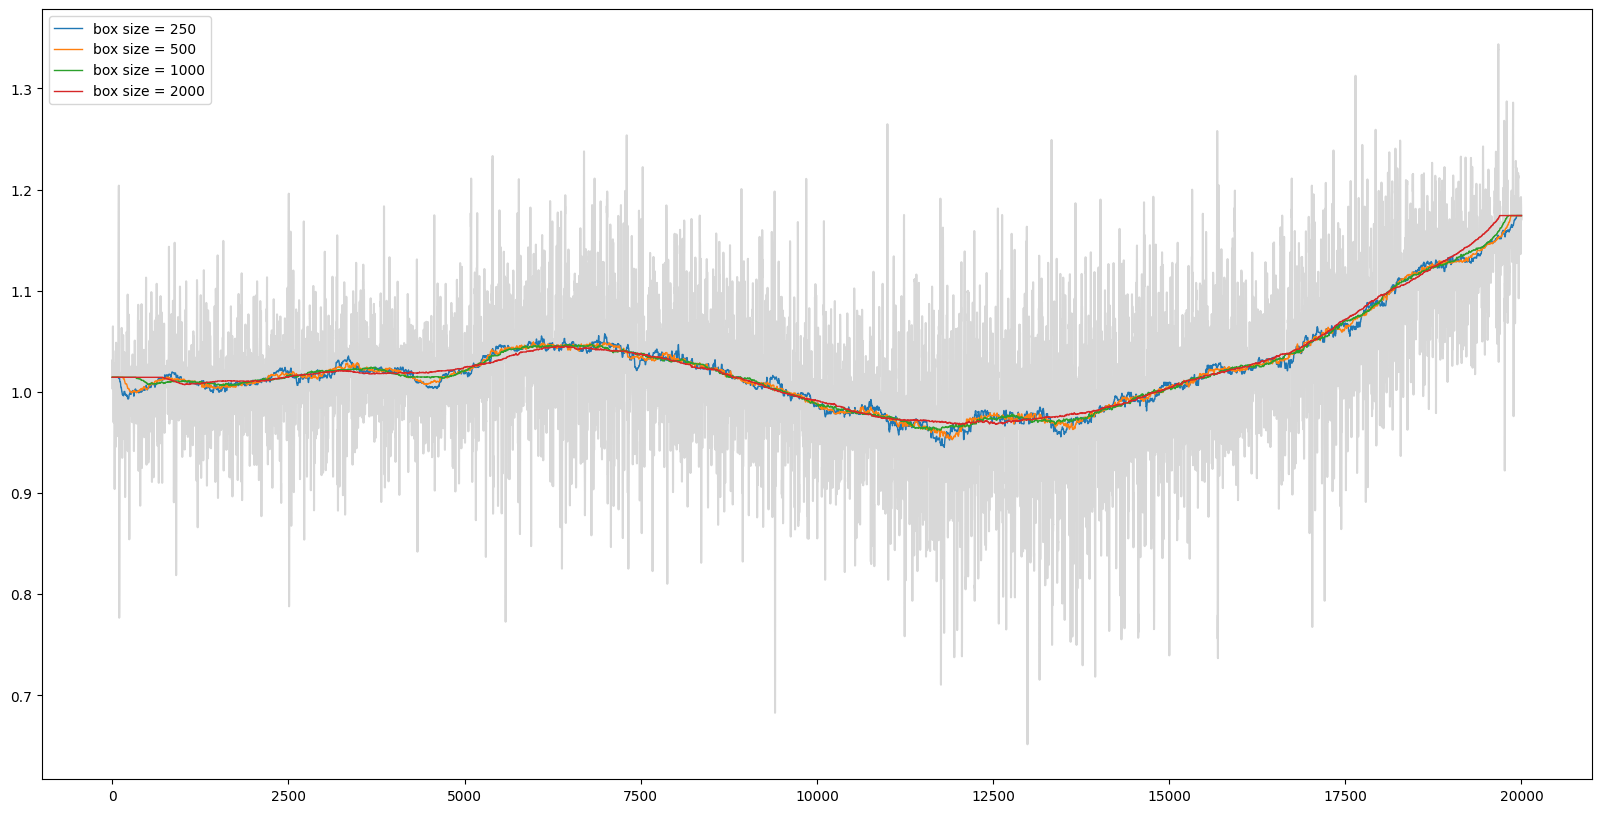

In [68]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(data20_ch2_gestures1['Grip'],c='grey',alpha=0.3)

for bs in [250,500,1000,2000]:
    ax.plot(data20_ch2_gestures1.index,median(data20_ch2_gestures1['Grip'],bs),lw=1,label='box size = {}'.format(bs)) #data with longer rest time shows better at start and end

ax.legend()
plt.show()
# 2000 bs is too dull and 250 bs is too sharp

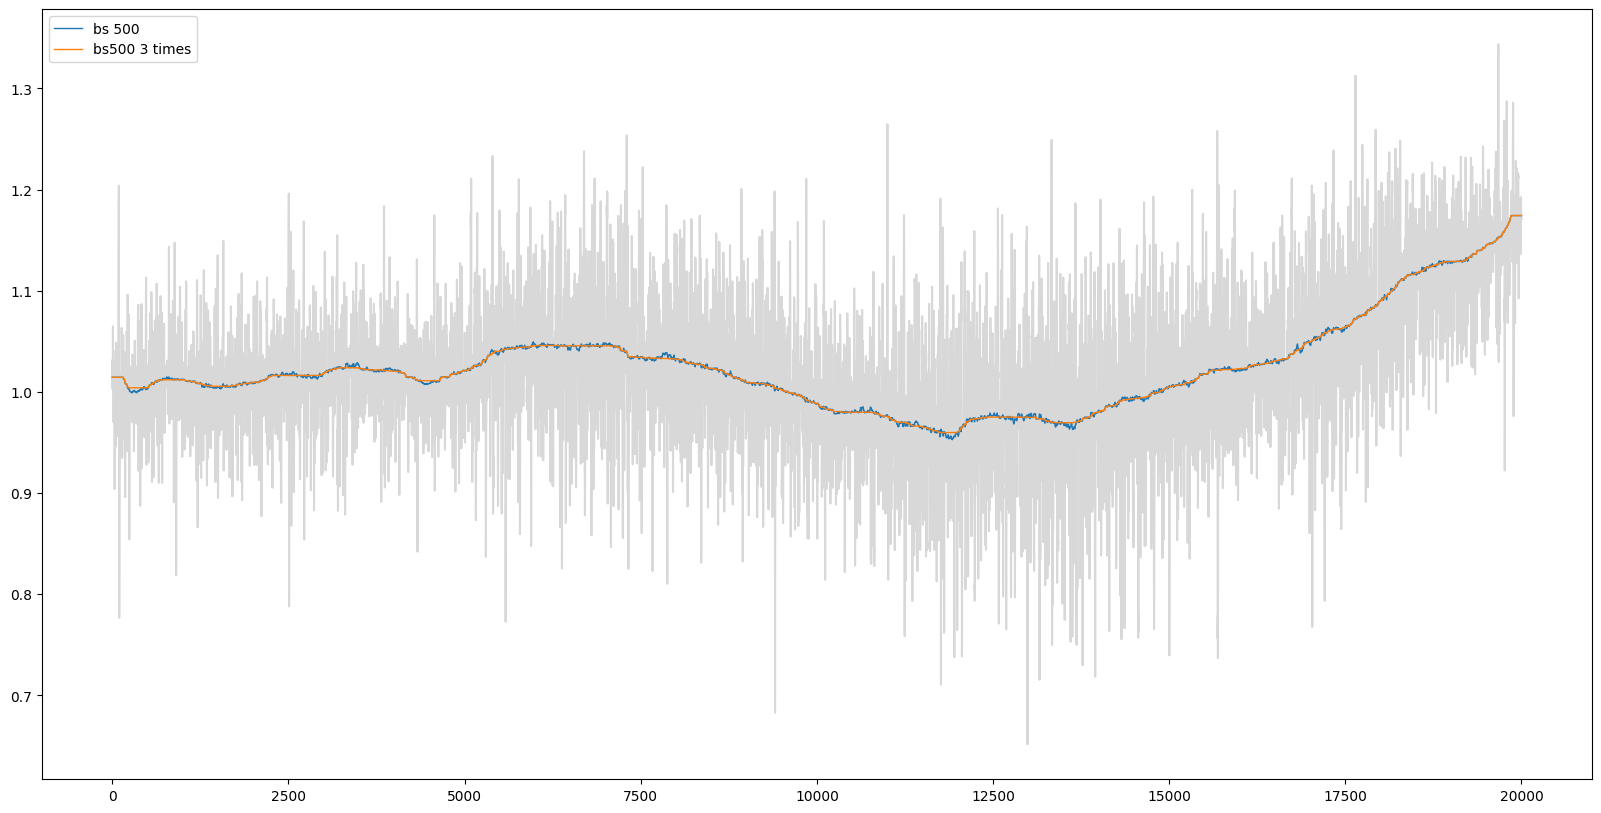

In [116]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(data20_ch2_gestures1['Grip'],c='grey',alpha=0.3)

ax.plot(data20_ch2_gestures1.index,median(data20_ch2_gestures1['Grip'],500),lw=1,label='bs 500')
iter_data = data20_ch2_gestures1['Grip']
for _ in range(3):
    iter_data = median(iter_data,500)
ax.plot(data20_ch2_gestures1.index,iter_data,lw=1,label='bs500 3 times') #smoother by iterating 5 times

ax.legend()
plt.show()

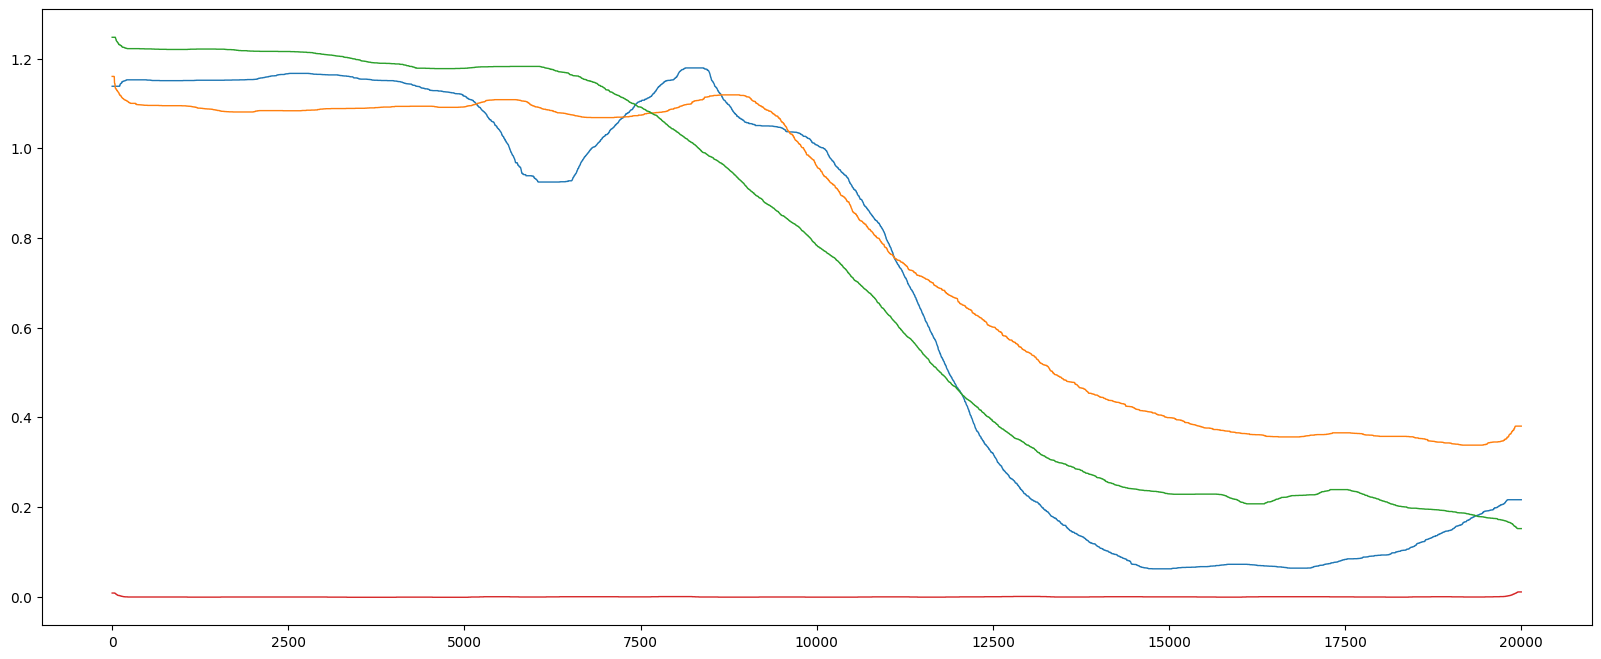

In [117]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

for i in range(4):
    itter_data = globals()['data20_ch{}_gestures1'.format(i+1)]['Supination']
    for _ in range(3):
        itter_data = median(itter_data,500)
    ax.plot(globals()['data20_ch{}_gestures1'.format(i+1)].index,itter_data,lw=1)

plt.show()